***Data Source from  : `Kaggle`***

**About Dataset**
Uber is a multinational transportation network company that operates a platform connecting riders with drivers through a mobile app. It was founded in 2009 and has since become one of the most well-known examples of a ride-hailing service. Uber allows users to request a ride from their current location to a desired destination using their smartphone. The app matches the user with an available driver in the area, and the driver arrives to pick up the passenger.

Uber offers various types of services, including UberX (standard car), UberXL (larger vehicles), UberBlack (luxury vehicles), and UberPOOL (shared rides with other passengers traveling in the same direction). The fares for rides are calculated based on factors such as distance traveled, time spent on the trip, and demand at the time of the request.

Uber has gained popularity for its convenience, ease of use, and competitive pricing compared to traditional taxi services. It has expanded its operations to numerous cities around the world and has also introduced other services like food delivery (Uber Eats) and package delivery (Uber Connect).

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from datetime import time  , datetime


Importing the data

In [2]:
# Reading the dataset
data = pd.read_csv('..//Downloads/UberDataset.csv')

In [3]:
#dataset shape and size

print(f'Dataset shape: {data.shape}')
print(f'Dataset size: {data.size}')

Dataset shape: (1156, 7)
Dataset size: 8092


Our Uber Dataset has 1156 records and 7 features or columns 

In [4]:
#Displaying the first 5 elements of the dataset

data.head(30)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


We can observe that that dataset has effectively 7 columns with :
- Start date of the trip(START_DATE)
- End date of the trip(END_DATE)
- Type of trip (CATEGORY)
- Pickup point (START)
- End point (STOP)
- distance travelled (MILES)
- trip purpose (PURPOSE)

In [5]:
# Checking the data types

data.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

Most of the columns are of `object` type 

In [6]:
# let's check for missing values
data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

We have 503 missings values for the `purpose` feature 

In [7]:
# Applying lower case on columns names
data.columns = data.columns.str.lower()

In [8]:
# applying the right formating to start_date and end_date records
data['start_date'] = data['start_date'].apply(lambda x: str(x).replace('/','-'))
data['start_date'] = data['start_date'].apply(lambda x: str(x).replace('/','-'))

In [9]:
data.head(20)

,start_date,end_date,category,start,stop,miles,purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [10]:
data[data['start_date']=='Totals']

,start_date,end_date,category,start,stop,miles,purpose
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [11]:
#dropping row # 1155
data.drop(index = [1155] , axis=0 , inplace = True)

In [12]:
# Converting start_date and end_date to datetime type 
data['start_date'] = pd.to_datetime(data['start_date'])
data['end_date'] = pd.to_datetime(data['end_date'] )


In [13]:
data.head(20)

,start_date,end_date,category,start,stop,miles,purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit


In [14]:
data[['start_date' ,'end_date']].describe()

,start_date,end_date
count,1155,1155
unique,1154,1154
top,2016-06-28 23:34:00,2016-06-28 23:59:00
freq,2,2
first,2016-01-01 21:11:00,2016-01-01 21:17:00
last,2016-12-31 22:08:00,2016-12-31 23:51:00


All trips happened in 2016 

In [15]:
# Lets add a new columns for month
data['trip_month'] = data['start_date'].apply(lambda x:str(x)[5:7])


In [16]:
round(data.category.value_counts() / data.shape[0] ,2)*100

Business    93.0
Personal     7.0
Name: category, dtype: float64

**93% of the trips are of Business type**

In [17]:
data.groupby('trip_month').agg({'start':'count' ,'stop':'count'}).sort_index

<bound method DataFrame.sort_index of             start  stop
trip_month             
01             61    61
02            115   115
03            113   113
04             54    54
05             49    49
06            108   108
07            112   112
08            133   133
09             36    36
10            106   106
11            122   122
12            146   146>

<AxesSubplot:xlabel='trip_month'>

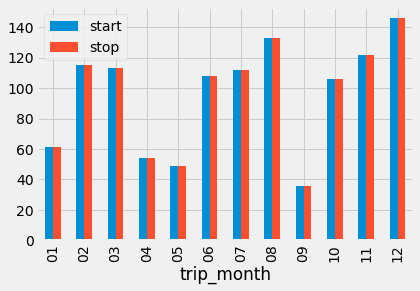

In [18]:
data.groupby('trip_month').agg({'start':'count' ,'stop':'count'}).plot(kind ='bar')

The highest trips happend in the month of december with 146 trips  follow by the month of August 133 trips

In [19]:
# let's evaluate the trips duration
data['start_time'] = data['start_date'].dt.time
data['end_time'] = data['end_date'].dt.time
data['trip_duration'] =data.apply(lambda row: datetime.combine(datetime.min, row['end_time']) - datetime.combine(datetime.min, row['start_time']), axis=1)


In [20]:
longest_trips = data['trip_duration'].sort_values(ascending=False).head(20)

In [21]:
#data['minute'] =  data['trip_duration'].dt.minute
#data['minutes'] = (data['trip_duration'].dt.total_seconds() % 3600) // 60
#data.minutes.sort_values(ascending =False).head(20)

In [22]:
print('The 20 longest trips ')
for index in longest_trips.index:
    print(f' --> trip of  {longest_trips[index]}      from {data.loc[index].start} to {data.loc[index].stop}')
    print('------------------------------------------------------------------------------------------------')

The 20 longest trips 
 --> trip of  0 days 05:30:00      from Latta to Jacksonville
------------------------------------------------------------------------------------------------
 --> trip of  0 days 03:26:00      from Morrisville to Banner Elk
------------------------------------------------------------------------------------------------
 --> trip of  0 days 03:05:00      from Boone to Cary
------------------------------------------------------------------------------------------------
 --> trip of  0 days 03:01:00      from Asheville to Mebane
------------------------------------------------------------------------------------------------
 --> trip of  0 days 02:58:00      from Unknown Location to Unknown Location
------------------------------------------------------------------------------------------------
 --> trip of  0 days 02:58:00      from Jacksonville to Ridgeland
------------------------------------------------------------------------------------------------
 --> trip o

<AxesSubplot:xlabel='hour'>

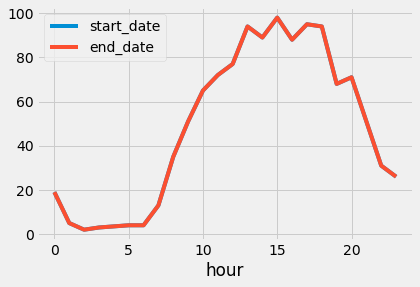

In [23]:
#Rush hours 
data['hour'] =data.start_date.dt.hour
data.groupby('hour').agg({'start_date':'count','end_date':'count'}).plot(kind='line')

  In the above line plot , we plotted the number of trips per hour over the year 2016, We can observe that the busiest period of the day is from 7:00 AM to 8:00 PM 

<AxesSubplot:xlabel='miles'>

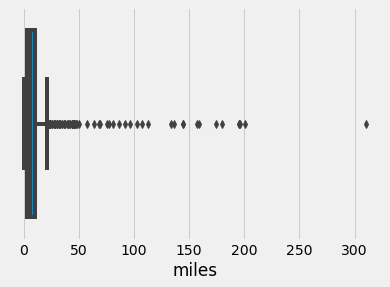

In [24]:
sns.boxplot(x='miles' , data=data)

The Boxplot of the miles above shows that we have some outliers , in the below code we will define a function to collect all the outliers then delete them from the records

In [25]:
#Defining the outliers function to collect all the outliers 
def outliers(columns):
    q1, q3 = np.percentile(data[columns] , [25 , 75])
    iqr = q3 -q1
    lower = q1 -1.5*iqr
    upper = q3+ 1.5*iqr
    
    return data[(data[columns]<=lower)| (data[columns]>=upper)][columns]

In [26]:
#Dropping the outliers in the "miles" feature

data.drop(index=outliers('miles').index , axis = 0 , inplace =True)

<AxesSubplot:xlabel='miles'>

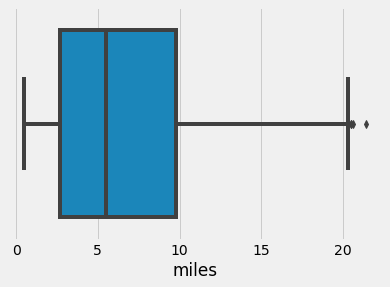

In [27]:
#Let's plot the box plot to confirm the deletion of the outliers
sns.boxplot(x='miles' , data=data)

We can confirm On the above plot that with don't have outliers anymore.